In [3]:
from offres_emploi import Api
import requests
import csv
import json
from pandas.io.json import json_normalize
import pandas as pd
from offres_emploi.utils import dt_to_str_iso
from offres_emploi.utils import filters_to_df

client = Api(client_id="PAR_dashboarddev_b8eb77c2a0477c4ba8b89cb638faef3c1dbe11a6b4a5a8f75d4fecfdd86de4db", 
             client_secret="bfd7c734dded72fbb57845accb953f4f6663729ceb3c14b413ba6a82b8d39ce5")
basic_search = client.search
basic_search
params  =  { 
   range:(0-149),
   "motsCles" : ('data'),
   "region" : 84
   } 

raw_data = client.search(params=params)
raw_data


Making request with params {<class 'range'>: -149, 'motsCles': 'data', 'region': 84}
Token has not been requested yet. Requesting token
Now requesting token


{'resultats': [{'id': '0414867',
   'intitule': 'DATA SCIENTIST - LYON (F/H) (H/F)',
   'description': "À proposRéinventer demain, accompagner les entreprises et les organisations dans la définition et la mise\nen œuvre de leurs projets de transformation. Chez novencia, nous sommes convaincus\u202fque\nl'individu est la clé du changement.\u202fEn tant que cabinet de conseil opérationnel, l'Expérience client & collaborateur, la Data & Marketing client, le Digital & Technology, les Services Financiers & Compliance, sont autant de\nproblématiques sur lesquelles nous aidons nos clients à grandir.- Expérience Client & Collaborateur\u202f:\u202f\u202fConcevoir l'expérience clients et salariés, la\ndigitaliser et la rendre opérationnelle, accompagner et mettre en œuvre les\ntransformations culturelles et l'évolution des compétences.\n- Data & Marketing client\u202f: Améliorer et personnaliser l'expérience utilisateur, la\nconnaissance client, l'animation marketing omnicanale.\n- Innovation & 

In [57]:
raw_data.keys()

dict_keys(['resultats', 'filtresPossibles', 'Content-Range'])

In [56]:
raw_data['resultats']

[{'id': '0314311',
  'intitule': 'Ingénieur Devops Data F/H (H/F)',
  'description': "Vous souhaitez intégrer un acteur majeur du e-commerce ? Delphine BRITTON, \nConsultante chez FED IT, dédiée au recrutement des métiers informatiques \nsur le secteur Rhône Alpes, recherche pour son client, un(e) Ingénieur \nDEVOPS Data dans le cadre d'un CDI.Au sein d'une équipe DEVOPS de 5 \npersonnes (Ingénieur, team leader, administrateur), vous aurez pour \nprincipale mission la gestion et l'évolution de la plateforme CLOUD sur la \npartie Data (Mysql, Elasticsearch, Environnement CLOUD et Docker). C'est \nune création de poste en interne afin de remplacer un prestataire \nactuel.Vous serez accompagné et formé sur la plateforme de production \ndéveloppée en interne par une équipe d'une soixantaine de développeurs. Vos \nmissions principales seront les suivantes :\n-Gestion et optimisation de la base de données et des outils data en \nmettant en place des outils et des métriques de performances et

In [40]:
raw_data['filtresPossibles']

[{'filtre': 'typeContrat',
  'agregation': [{'valeurPossible': 'CDD', 'nbResultats': 3},
   {'valeurPossible': 'CDI', 'nbResultats': 13},
   {'valeurPossible': 'MIS', 'nbResultats': 2}]},
 {'filtre': 'experience',
  'agregation': [{'valeurPossible': '0', 'nbResultats': 1},
   {'valeurPossible': '1', 'nbResultats': 6},
   {'valeurPossible': '2', 'nbResultats': 8},
   {'valeurPossible': '3', 'nbResultats': 3}]},
 {'filtre': 'qualification',
  'agregation': [{'valeurPossible': '0', 'nbResultats': 6},
   {'valeurPossible': '9', 'nbResultats': 6},
   {'valeurPossible': 'X', 'nbResultats': 6}]},
 {'filtre': 'natureContrat',
  'agregation': [{'valeurPossible': 'E1', 'nbResultats': 18}]}]

In [4]:
df=pd.DataFrame(raw_data['resultats'])
df

,id,intitule,description,dateCreation,dateActualisation,lieuTravail,romeCode,romeLibelle,appellationlibelle,entreprise,...,qualificationCode,qualificationLibelle,secteurActivite,secteurActiviteLibelle,qualitesProfessionnelles,formations,agence,permis,experienceCommentaire,complementExercice
0,0414867,DATA SCIENTIST - LYON (F/H) (H/F),"À proposRéinventer demain, accompagner les ent...",2021-02-09T03:08:26.000Z,2021-02-09T03:08:26.000Z,"{'libelle': '69 - LYON 01', 'latitude': 45.758...",M1403,Études et prospectives socio-économiques,Data scientist,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110FLJT,Gestionnaire systèmes d'information et master ...,VOTRE ROLE sous la supervision du Responsable ...,2021-02-08T18:27:32.000Z,2021-02-09T10:47:52.000Z,"{'libelle': '74 - CHAVANOD', 'latitude': 45.88...",M1806,Conseil et maîtrise d'ouvrage en systèmes d'in...,Gestionnaire d'applications système d'information,{'nom': 'REBOUL S.A.S.'},...,7,Technicien,25,Fabrication d'emballages métalliques légers,"[{'libelle': 'Rigueur', 'description': 'Capaci...",NaN,NaN,NaN,NaN,NaN
2,0314311,Ingénieur Devops Data F/H (H/F),Vous souhaitez intégrer un acteur majeur du e-...,2021-02-06T03:10:20.000Z,2021-02-06T05:11:31.000Z,"{'libelle': '69 - LYON 01', 'latitude': 45.758...",M1805,Études et développement informatique,Ingénieur / Ingénieure de développement inform...,{'nom': 'Fed It'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0229944,Ingénieur DATA / BI H/F,"Lynx RH Grenoble, agence de recrutement en int...",2021-02-04T07:02:40.000Z,2021-02-04T18:46:26.000Z,{'libelle': '74 - Savoie (Haute)'},M1805,Études et développement informatique,Ingénieur concepteur / Ingénieure conceptrice ...,{'nom': 'Lynx Rh Grenoble'},...,NaN,NaN,78,Activités des agences de travail temporaire,NaN,NaN,NaN,NaN,NaN,NaN
4,109XMSB,CHARGE(E) DE MISSION DATA-MANAGEMENT BASE DONN...,Les missions du poste seront :\n- Permettre l'...,2021-02-01T12:22:07.000Z,2021-02-08T22:04:17.000Z,{'libelle': '69 - Rhône'},K2402,"Recherche en sciences de l'univers, de la mati...",Informaticien / Informaticienne de la recherch...,{'nom': 'HCL SIEGE ADMINISTRATIF'},...,8,Agent de maîtrise,86,Activités hospitalières,"[{'libelle': 'Travail en équipe', 'description...","[{'codeFormation': '12008', 'domaineLibelle': ...","{'courriel': 'Pour postuler, utiliser le lien ...",NaN,NaN,NaN
5,109VTZY,Délégué / Déléguée à la protection des données...,Garant de la mise en conformité de l'entrepris...,2021-01-28T15:43:01.000Z,2021-02-09T10:05:51.000Z,"{'libelle': '01 - BOURG EN BRESSE', 'latitude'...",K1903,Défense et conseil juridique,Délégué(e) à la protection des données - DPO,"{'nom': 'DYNACITE', 'description': 'DYNACITE, ...",...,9,Cadre,68,Location de logements,"[{'libelle': 'Persévérance', 'description': 'C...","[{'codeFormation': '13254', 'domaineLibelle': ...",NaN,"[{'libelle': 'B - Véhicule léger', 'exigence':...",NaN,NaN
6,9767951,"Ingénieur Commercial Junior - BI, Cloud & Data...",Rattaché(e) à la Direction commerciale Régiona...,2021-01-24T05:13:25.000Z,2021-01-24T05:13:25.000Z,"{'libelle': '69 - LYON 01', 'latitude': 45.763...",D1407,Relation technico-commerciale,Ingénieur commercial / Ingénieure commerciale,{'nom': 'Washington Frank'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9752137,DATA MANAGER (H/F),Nous recherchons pour le compte de notre clien...,2021-01-23T14:54:36.000Z,2021-02-08T10:55:41.000Z,"{'libelle': '38 - SASSENAGE', 'latitude': 45.2...",M1802,Expertise et support en systèmes d'information,Data manager,{'nom': 'Randstad'},...,NaN,NaN,78,Activités des agences de travail temporaire,NaN,NaN,NaN,NaN,NaN,NaN
8,109MDPV,Ingénieur Data H/F,"Au sein d'une équipe à taille humaine, et dans...",2021-01-19T10:53:30.000Z,2021-02-03T10:27:21.000Z,"{'libelle': '69 - VILLEURBANNE', 'latitude': 4...",M1403,Études et prospectives socio-économiques,Data analyst,"{'nom': 'EFFEKTIV', 'description': 'EFFEKTIV e...",...,9,Cadre,70,Conseil pour les affaires et autres conseils d...,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df.info

<bound method DataFrame.info of          id                                           intitule  \
0   0414867                  DATA SCIENTIST - LYON (F/H) (H/F)   
1   110FLJT  Gestionnaire systèmes d'information et master ...   
2   0314311                    Ingénieur Devops Data F/H (H/F)   
3   0229944                            Ingénieur DATA / BI H/F   
4   109XMSB  CHARGE(E) DE MISSION DATA-MANAGEMENT BASE DONN...   
5   109VTZY  Délégué / Déléguée à la protection des données...   
6   9767951  Ingénieur Commercial Junior - BI, Cloud & Data...   
7   9752137                                 DATA MANAGER (H/F)   
8   109MDPV                                 Ingénieur Data H/F   
9   109LLVB  Assistant(e) Administratif(ve)/ Data Analyste ...   
10  9447702      Data analyst - ( R ou Python) Lyon (IT) (H/F)   
11  109CWKR  Consultant Stratégie et Gouvernance Data F/H  ...   
12  109CVWZ                               Data Tech Lead (H/F)   
13  109CVQG              Consultant Data et 

In [47]:
df.to_csv ('export_dataframe.csv', index = False, header=True)

In [6]:
for column in df:
     print(column)

id
intitule
description
dateCreation
dateActualisation
lieuTravail
romeCode
romeLibelle
appellationlibelle
entreprise
typeContrat
typeContratLibelle
natureContrat
experienceExige
experienceLibelle
salaire
dureeTravailLibelleConverti
alternance
nombrePostes
origineOffre
langues
competences
dureeTravailLibelle
contact
accessibleTH
deplacementCode
deplacementLibelle
qualificationCode
qualificationLibelle
secteurActivite
secteurActiviteLibelle
qualitesProfessionnelles
formations
agence
permis
experienceCommentaire
complementExercice


In [48]:
list(df)

['id',
 'intitule',
 'description',
 'dateCreation',
 'dateActualisation',
 'lieuTravail',
 'romeCode',
 'romeLibelle',
 'appellationlibelle',
 'entreprise',
 'typeContrat',
 'typeContratLibelle',
 'natureContrat',
 'experienceExige',
 'experienceLibelle',
 'salaire',
 'dureeTravailLibelleConverti',
 'alternance',
 'nombrePostes',
 'origineOffre',
 'secteurActivite',
 'secteurActiviteLibelle',
 'formations',
 'langues',
 'competences',
 'dureeTravailLibelle',
 'contact',
 'agence',
 'accessibleTH',
 'deplacementCode',
 'deplacementLibelle',
 'qualificationCode',
 'qualificationLibelle',
 'qualitesProfessionnelles',
 'permis',
 'experienceCommentaire',
 'complementExercice']

In [7]:
colonnes_a_garder = ['id', 'intitule', 'description', 'dateActualisation', 'appellationlibelle', 'typeContrat', 'entreprise', 'lieuTravail' ]

In [9]:
donnees_propres = df[colonnes_a_garder]
donnees_propres

,id,intitule,description,dateActualisation,appellationlibelle,typeContrat,entreprise,lieuTravail
0,0414867,DATA SCIENTIST - LYON (F/H) (H/F),"À proposRéinventer demain, accompagner les ent...",2021-02-09T03:08:26.000Z,Data scientist,CDI,{},"{'libelle': '69 - LYON 01', 'latitude': 45.758..."
1,110FLJT,Gestionnaire systèmes d'information et master ...,VOTRE ROLE sous la supervision du Responsable ...,2021-02-09T10:47:52.000Z,Gestionnaire d'applications système d'information,CDI,{'nom': 'REBOUL S.A.S.'},"{'libelle': '74 - CHAVANOD', 'latitude': 45.88..."
2,0314311,Ingénieur Devops Data F/H (H/F),Vous souhaitez intégrer un acteur majeur du e-...,2021-02-06T05:11:31.000Z,Ingénieur / Ingénieure de développement inform...,CDI,{'nom': 'Fed It'},"{'libelle': '69 - LYON 01', 'latitude': 45.758..."
3,0229944,Ingénieur DATA / BI H/F,"Lynx RH Grenoble, agence de recrutement en int...",2021-02-04T18:46:26.000Z,Ingénieur concepteur / Ingénieure conceptrice ...,MIS,{'nom': 'Lynx Rh Grenoble'},{'libelle': '74 - Savoie (Haute)'}
4,109XMSB,CHARGE(E) DE MISSION DATA-MANAGEMENT BASE DONN...,Les missions du poste seront :\n- Permettre l'...,2021-02-08T22:04:17.000Z,Informaticien / Informaticienne de la recherch...,CDD,{'nom': 'HCL SIEGE ADMINISTRATIF'},{'libelle': '69 - Rhône'}
5,109VTZY,Délégué / Déléguée à la protection des données...,Garant de la mise en conformité de l'entrepris...,2021-02-09T10:05:51.000Z,Délégué(e) à la protection des données - DPO,CDI,"{'nom': 'DYNACITE', 'description': 'DYNACITE, ...","{'libelle': '01 - BOURG EN BRESSE', 'latitude'..."
6,9767951,"Ingénieur Commercial Junior - BI, Cloud & Data...",Rattaché(e) à la Direction commerciale Régiona...,2021-01-24T05:13:25.000Z,Ingénieur commercial / Ingénieure commerciale,CDI,{'nom': 'Washington Frank'},"{'libelle': '69 - LYON 01', 'latitude': 45.763..."
7,9752137,DATA MANAGER (H/F),Nous recherchons pour le compte de notre clien...,2021-02-08T10:55:41.000Z,Data manager,MIS,{'nom': 'Randstad'},"{'libelle': '38 - SASSENAGE', 'latitude': 45.2..."
8,109MDPV,Ingénieur Data H/F,"Au sein d'une équipe à taille humaine, et dans...",2021-02-03T10:27:21.000Z,Data analyst,CDI,"{'nom': 'EFFEKTIV', 'description': 'EFFEKTIV e...","{'libelle': '69 - VILLEURBANNE', 'latitude': 4..."
9,109LLVB,Assistant(e) Administratif(ve)/ Data Analyste ...,Spécialiste de l'organisation de la gestion du...,2021-02-05T12:23:29.000Z,Expert / Experte méthodes et qualité informatique,CDI,{'nom': 'CASH MANAGEMENT SERVICES'},"{'libelle': '69 - RILLIEUX LA PAPE', 'latitude..."


In [52]:
donnees_propres_lieux = ['lieuTravail'][0]
donnees_propres_YX = df[donnees_propres_lieux]
donnees_propres_YX
#type(donnees_propres_YX)

0     {'libelle': '69 - LYON 01', 'latitude': 45.758...
1     {'libelle': '74 - CHAVANOD', 'latitude': 45.88...
2     {'libelle': '69 - LYON 01', 'latitude': 45.758...
3                    {'libelle': '74 - Savoie (Haute)'}
4                             {'libelle': '69 - Rhône'}
5     {'libelle': '01 - BOURG EN BRESSE', 'latitude'...
6     {'libelle': '69 - LYON 01', 'latitude': 45.763...
7     {'libelle': '38 - SASSENAGE', 'latitude': 45.2...
8     {'libelle': '69 - VILLEURBANNE', 'latitude': 4...
9     {'libelle': '69 - RILLIEUX LA PAPE', 'latitude...
10    {'libelle': '69 - LYON 01', 'latitude': 45.758...
11    {'libelle': '69 - LYON 03', 'latitude': 45.758...
12    {'libelle': '69 - LYON 01', 'latitude': 45.758...
13    {'libelle': '69 - LYON 01', 'latitude': 45.758...
14    {'libelle': '69 - VENISSIEUX', 'latitude': 45....
15    {'libelle': '74 - PUBLIER', 'latitude': 46.390...
16    {'libelle': '38 - ST MARTIN D HERES', 'latitud...
17    {'libelle': '73 - VAL D ISERE', 'latitude'

In [77]:
    for i in donnees_propres_YX:
    #print(i.keys())
       # i["longitude"]
        print(i.get("longitude"))
        print(i.get("latitude"))
        

4.835
45.758
6.052324
45.88181
4.835
45.758
None
None
None
None
5.241979
46.206562
4.83385
45.76324
5.661989
45.214137
4.890035
45.768975
4.892794
45.818368
4.835
45.758
4.835
45.758
4.835
45.758
4.835
45.758
4.881379
45.707095
6.543294
46.390839
5.762904
45.179494
6.973383
45.453223


In [47]:
donnees_propres_YX.to_json ('lieux.json')
lieux = 'lieux.json'
xy = 

'lieux.json'

In [50]:
for i in range(len(lieux[0])):
    xy["longitude"].append(["libelle"][i]["latitude"]["longitude"])

NameError: name 'xy' is not defined

In [49]:
filters = raw_data['filtresPossibles']
results =  raw_data['resultats']
content_range = raw_data['Content-Range']

In [50]:
filters_df = filters_to_df(filters)
filters_df

,filtre,valeur_possible,nb_resultats
0,typeContrat,CDD,3
1,typeContrat,CDI,11
2,typeContrat,MIS,2
3,experience,0,1
4,experience,1,5
5,experience,2,7
6,experience,3,3
7,qualification,0,5
8,qualification,9,6
9,qualification,X,5


In [52]:
content_range['max_results']

'16'

TypeError: map() missing 1 required positional argument: 'func'

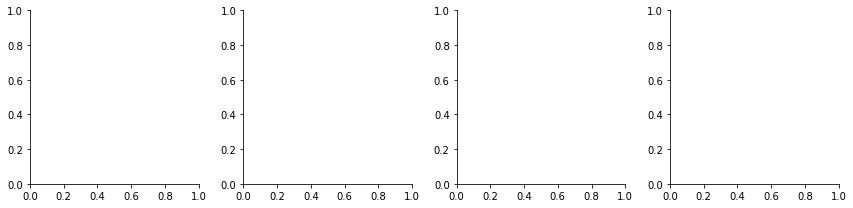

In [53]:
import seaborn as sns
g = sns.FacetGrid(filters_df, col="filtre", sharex=False, sharey=False)
g = g.map(data=sns.barplot, row="valeur_possible", col="nb_resultats")

In [48]:
import datetime
import csv
from pandas.io.json import json_normalize
import pandas as pd
from offres_emploi import Api
from offres_emploi.utils import dt_to_str_iso
from offres_emploi.utils import filters_to_df

#__API pole emploi : collecte de données__

client = Api(client_id="PAR_dashboarddev_b8eb77c2a0477c4ba8b89cb638faef3c1dbe11a6b4a5a8f75d4fecfdd86de4db", 
             client_secret="bfd7c734dded72fbb57845accb953f4f6663729ceb3c14b413ba6a82b8d39ce5")

#__parametre de de la date des offres collectées__



#__Parametres de selection des offres à recuperer___

params  =  { 
    range:(0 - 149),
    "motsCles" : ('data science', 'data'),
    "region" : 84,
} 

raw_data = client.search(params = params)
raw_data

Making request with params {<class 'range'>: -149, 'motsCles': ('data science', 'data'), 'region': 84}
Token has not been requested yet. Requesting token
Now requesting token


{'resultats': [{'id': '109XMSB',
   'intitule': 'CHARGE(E) DE MISSION DATA-MANAGEMENT BASE DONNEES MALADIES  (H/F)',
   'description': "Les missions du poste seront :\n- Permettre l'interopérabilité et le déploiement de la base de données BaMaRa en lien avec la\nBanque Nationale de Données Maladies Rares (BNDMR) et les Directions des Systèmes\nd'Information (DSI) des établissements hospitaliers\n- Faire un état des lieux précis des bases de données utilisées dans chacun des centres de\nréférence et de compétences\n- Former à l'utilisation de l'application BaMaRa et être un relais pour les centres de référence et\nde compétence de la filière\n- S'assurer de la bonne saisie des données\n- Assurer un suivi administratif des conventions et autres documents administratifs relatifs à\nBaMaRa entre la BNDMR et les DSI des centres hospitaliers\n- Participer à la mise en place et au fonctionnement de la plateforme nationale facilitant la\ndemande d'examens génétiques.",
   'dateCreation': '2021

In [36]:
import datetime
import csv
from pandas.io.json import json_normalize
import pandas as pd
from offres_emploi import Api
from offres_emploi.utils import dt_to_str_iso
from offres_emploi.utils import filters_to_df

#__API pole emploi : collecte de données__

client = Api(client_id="PAR_dashboarddev_b8eb77c2a0477c4ba8b89cb638faef3c1dbe11a6b4a5a8f75d4fecfdd86de4db", 
             client_secret="bfd7c734dded72fbb57845accb953f4f6663729ceb3c14b413ba6a82b8d39ce5")

#__parametre de de la date des offres collectées__



#__Parametres de selection des offres à recuperer___

referentiel_metiers = client.referentiel('informatique')


NameError: name 'params' is not defined